The dynamical equations are given as

\begin{align}
\dot{S_{ni}}	    &=-\lambda_{ni}(t)S_{ni}+\sigma_{ni},\\
\dot{E}_{ni}	    &=\lambda_{i}(t)S_{ni}-\gamma_{E}E_{ni},\\
\dot{I}_{ni}^{a}	&=\alpha\gamma_{E}E_{ni}-\gamma_{I^{a}}I_{ni}^{a},\\
\dot{I}_{ni}^{s}	&=\bar{\alpha}\gamma_{E}E_{ni}-\gamma_{I^{s}}I_{ni}^{s},\\
\dot{I}_{ni}^{h}	&=h_{i}\gamma_{I^{s}}I_{ni}^{s}-\gamma_{I^{h}}I_{ni}^{h},\\
\dot{I}_{ni}^{c}	&=c_{i}\gamma_{I^{h}}I_{ni}^{h}-\gamma_{I^{c}}I_{ni}^{c},\\
\dot{I}_{ni}^{m}	&=m_{i}\gamma_{I^{c}}I_{ni}^{c},\\
\dot{N}_{ni}	    &=\sigma_{ni}-m_{ni}\gamma_{I^{c}}I_{ni}^{c}
\end{align}



The key idea is to note that the rate of infection of a susceptible individual in age group `i` at the node `n` is given as

\begin{align}
\lambda_{ni}(t)=\lambda^0_{ni}(t)=\beta\sum_{j=1}^{M}\left(C_{ij}\frac{I_{nj}^{a}}{N_{j}}+f_{sa}C_{ij}\frac{I_{nj}^{s}}{N_{j}}\right)
\end{align}


Commute can then be modeled by changing this to


\begin{align}
\lambda_{ni}^{T}(t)=\beta\sum_{j=1}^{M}\sum_{n=1,n\neq m}^{Nd}r_{T}T_{nm}\left(C_{ij}\frac{I_{mj}^{a}}{N_{j}}+f_{sa}C_{ij}\frac{I_{mj}^{s}}{N_{j}}\right).
\end{align}


while workplace interaction can be modeled as


\begin{align}
\lambda_{ni}^{W}(t)=\beta\sum_{j=1}^{M}\sum_{n=1,n\neq m}^{Nd}r_{W}W_{nm}\left(C_{ij}\frac{I_{mj}^{a}}{N_{j}}+f_{sa}C_{ij}\frac{I_{mj}^{s}}{N_{j}}\right).
\end{align}



The simulation then runs by choosing appropriate $\lambda$ as a function of time. The constants $r_T$ and $r_W$ control the strength of interactions and the matrices $W_{nm}$ and $T_{nm}$ specify which `nm` nodes interact.




In [1]:
%%capture
## compile for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import nodgeo
import matplotlib.pyplot as plt
#from matplotlib import rc; rc('text', usetex=True)

In [3]:
M=16  # number of age groups

# load age structure data
my_data = np.genfromtxt('data/age_structures/UK.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

# set age groups
Ni0=aM+aF;   Ni0=Ni0[0:M];  

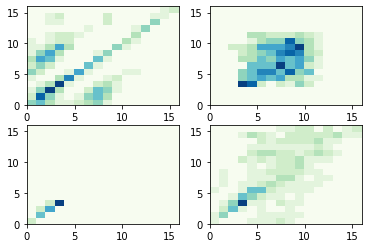

In [4]:
my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_home_2.xlsx', sheet_name='United Kingdom of Great Britain')
CH0 = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_work_2.xlsx', sheet_name='United Kingdom of Great Britain',index_col=None)
CW0 = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_school_2.xlsx', sheet_name='United Kingdom of Great Britain',index_col=None)
CS0 = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_other_locations_2.xlsx', sheet_name='United Kingdom of Great Britain',index_col=None)
CO0 = np.array(my_data)

CH = np.zeros((16, 16))
CH[0,:]= np.array((0.478812799633172, 0.55185413960287,0.334323605154544,0.132361228266194,0.138531587861408,0.281604887066586,0.406440258772792,0.493947983343078,0.113301080935514,0.0746826413664804,0.0419640342896305,0.0179831987029717,0.00553694264516568,0.00142187285266089,0,0.000505582193632659))
for i in range(15):
    CH[i+1, :] = CH0[i, :]

    
CW = np.zeros((16, 16))
CW[0,:]= np.array((0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000820604524144799,0.0000120585150153575,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000316436833811157))
for i in range(15):
    CW[i+1, :] = CW0[i, :]

    
CS = np.zeros((16, 16))
CS[0,:]= np.array((0.974577996106766,0.151369805263473,0.00874880925953218,0.0262790907947637,0.0111281607429249,0.0891043051294382,0.125477587043249,0.0883182775274553,0.0371824197201174,0.0294092695284747,0.0000000000000000000000000000000000000510911446027435,0.0000000000000000000000000000000113982464440009,0.00758428705895781,0.00151636767747242,0.0000000000000000000000000000000000000000000000000123262013953524,0.000000000000000000000000000000000000000000000000000000000000000597486362181075))
for i in range(15):
    CS[i+1, :] = CS0[i, :]

CO = np.zeros((16, 16))
CO[0,:]= np.array((0.257847576361162,0.100135168376607,0.0458036773638843,0.127084549151753,0.187303683093508,0.257979214509792,0.193228849121415,0.336594916946786,0.309223290169635,0.070538522966953,0.152218422246435,0.113554851510519,0.0615771477785246,0.040429874099682,0.0373564987094767,0.00669781557624776))
for i in range(15):
    CO[i+1, :] = CO0[i, :]

## matrix of total contacts
C=CH+CW+CS+CO



fig,aCF =  plt.subplots(2,2);
aCF[0][0].pcolor(CH, cmap=plt.cm.get_cmap('GnBu', 10));
aCF[0][1].pcolor(CW, cmap=plt.cm.get_cmap('GnBu', 10));
aCF[1][0].pcolor(CS, cmap=plt.cm.get_cmap('GnBu', 10));
aCF[1][1].pcolor(CO, cmap=plt.cm.get_cmap('GnBu', 10));



In [5]:
beta  = 0.4/24            # infection rate 

gE    = (1.0/5)/24
gIa   = (1.0/7)/24                # recovery rate of asymptomatic infectives 
gIs   = (1.0/7)/24                # recovery rate of symptomatic infectives 
alpha = 0.3                 # fraction of asymptomatic infectives 
fsa   = 1                 # the self-isolation parameter   
 
gIh   = (1.0/14)/24
gIc   = (1.0/1)/24
 
sa    = 100*np.ones(M)      #  rate of additional/removal of population by birth etc
sa[0]     = 1500            # birth
sa[12:16] = -300            # mortality


hh   = 0.1*np.ones(M)       # fraction which goes from Is to hospital
cc   = 0.05*np.ones(M)      # fraction which goes from  hospital to ICU 
mm   = np.zeros(M)       # mortality from IC
mm = np.array((0,0,.0,1,1,1,1,1,1,3.5,3.5,3.5,3.5,6,6,14.2))/100  


In [6]:


beta  = 1/24            # infection rate 
gE    = (1.0/5)/24
gIa   = (1.0/7)/24                # recovery rate of asymptomatic infectives 
gIs   = (1.0/7)/24                # recovery rate of symptomatic infectives 
alpha = 0.3                 # fraction of asymptomatic infectives 
fsa   = 1                 # the self-isolation parameter   
 
gIh   = (1.0/7)/24
gIc   = (1.0/7)/24
 
sa    = 0*np.ones(M)      #  rate of additional/removal of population by birth etc


hh   = 0.5*np.ones(M)       # fraction which goes from Is to hospital
cc   = np.array((0,0,.0,1,1,1,1,1,1,3.5,3.5,3.5,3.5,6,6,14.2))/100  
mm   = 0.5*cc      # fraction which goes from  hospital to ICU 


Nd=21

N0= np.zeros((M*Nd))
for i in range(Nd):
    N0[i*M:(i+1)*M]=Ni0/Nd
Ni = N0

E0   = np.zeros((M*Nd));   
Ia0  = 0*np.ones((M*Nd));  #   Ia0[6:13]=4;  Ia0[2:6]=2; Ia0[13:16]=2
Is0  = 0*np.ones((M*Nd));  #Is_0[6:13]=8;  Is_0[2:6]=4; Is_0[13:16]=4


for i in range(int(Nd/3)):
    Ia0[3*M*i:3*M*i+10] = 10
Is0 = Ia0

Ih0  = np.zeros((M*Nd))
Ic0  = np.zeros((M*Nd))
Im0  = np.zeros((M*Nd))
R0   = np.zeros((M*Nd))


S0  = Ni - (E0 + Ia0 + Is0 + Ih0 + Ic0 + Im0 + R0)

tL, wL = 6, 6# int(Nd/5), int(Nd/5)
Tr = np.zeros((Nd, tL))
Wo = np.zeros((Nd, wL))

for i in range(Nd):
    Tr[i,:] = np.linspace(i+1, i+tL, tL)%(Nd-1)#np.random.randint(Nd, size=tL)
    Wo[i,:] = np.linspace(i+1, i+wL, wL)%(Nd-1)#np.random.randint(Nd, size=wL)


rW, rT = .1, .1


def contactMatrix(t):   
    return C

# duration of simulation and data file
Tf = 24*60;  Nt=120; 

# instantiate model
parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,
              'gIh':gIh,'gIc':gIc,  'gE':gE,
              'fsa':fsa,  'rW':rW, 'rT':rT,
              'hh':hh, 'cc':cc, 'mm':mm}
model = nodgeo.deterministic.SEI5R(parameters, Nd, M, Ni, Wo, Tr)



# simulate model 
#data = model.simulate(S0, E0, Ia0, Is0, Ih0, Ic0, Im0, contactMatrix, Tf, Nt, nodeInteraction='False')


## Non-interacting nodes

[240.80747323   0.           0.         240.80747323]


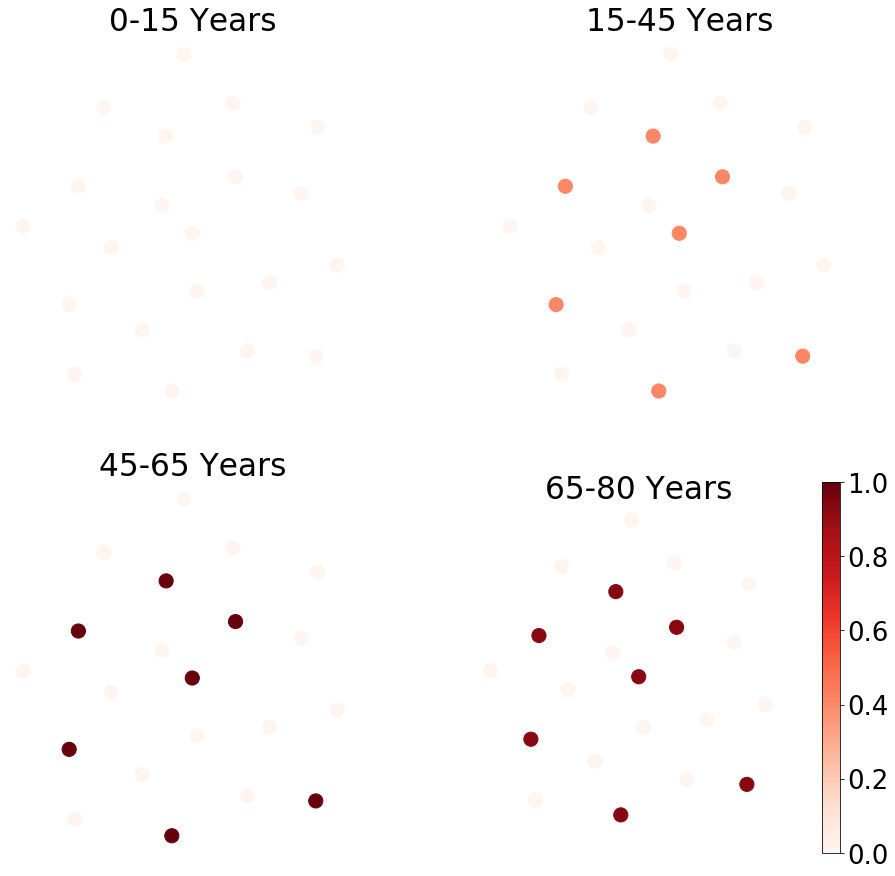

In [7]:
data = model.simulate(S0, E0, Ia0, Is0, Ih0, Ic0, Im0, contactMatrix, Tf, Nt, nodeInteraction='False')

## first M*Nd points are S, then M*Nd points are E, then M*Nd points are Ia,  Is, Ih, Ic, Im, Ni
## thus a total of 8*M*Nd points


radius = np.sqrt(np.arange(Nd)/float(Nd))
golden_angle = np.pi * (3 - np.sqrt(5)); theta = golden_angle * np.arange(Nd)
points = np.zeros((Nd, 2)); points[:,0] = np.cos(theta); points[:,1] = np.sin(theta)
points *= radius.reshape((Nd, 1));  points = points*4*np.sqrt(Nd)

plt.rcParams.update({'font.size': 26})



M1=5*M*Nd
f = plt.figure(figsize=(16, 15));   
for ti in range(1):
    ti=Nt-1
    IM1=np.zeros((Nd));  IM2=np.zeros((Nd));  IM3=np.zeros((Nd));  IM4=np.zeros((Nd))
    IS=np.zeros((Nd)); 

    for n in range(Nd):
        for i in range(3):
            IM1[n] += data['X'][ti, M1+n*M+i]
            IS[n] += data['X'][ti, 3*M*Nd+n*M+i]
        for i in range(6):
            IM2[n] += data['X'][ti, M1+n*M+3+i]
        for i in range(4):
            IM3[n] += data['X'][ti, M1+n*M+9+i]
        for i in range(3):
            IM4[n] += data['X'][ti, M1+n*M+12+i]
    
    print(IM4[0:4])
    #print(IS[0:4])
    Imm = (np.max((IM1, IM2, IM3, IM4))) + 0.000001
    IM1 = IM1/Imm
    IM2 = IM2/Imm
    IM3 = IM3/Imm
    IM4 = IM4/Imm


    sz=200
    sp =  f.add_subplot(2,2,1);
    plt.scatter(points[:,0], points[:,1], s=sz*np.ones(Nd), c=IM1, cmap=plt.cm.Reds)
    plt.clim(0, 1);  plt.title('0-15 Years'); plt.axis('square'); plt.axis('off');

    sp =  f.add_subplot(2,2,2);
    plt.scatter(points[:,0], points[:,1], s=sz*np.ones(Nd), c=IM2, cmap=plt.cm.Reds)
    plt.clim(0, 1);   plt.title('15-45 Years'); plt.axis('square'); plt.axis('off');

    sp =  f.add_subplot(2,2,3);
    plt.scatter(points[:,0], points[:,1], s=sz*np.ones(Nd), c=IM3, cmap=plt.cm.Reds)
    plt.clim(0, 1);    plt.title('45-65 Years'); plt.axis('square'); plt.axis('off');

    sp =  f.add_subplot(2,2,4);
    plt.scatter(points[:,0], points[:,1], s=sz*np.ones(Nd), c=IM4, cmap=plt.cm.Reds)
    plt.clim(0, 1); plt.title('65-80 Years'); plt.axis('square'); plt.axis('off'); plt.colorbar(); 
    
    #plt.savefig('this%05d_.png'%(ti))
    #plt.clf()








## Interacting nodes

[4.04939668e+01 1.56548068e-02 8.94013802e+00 3.42940977e+01]


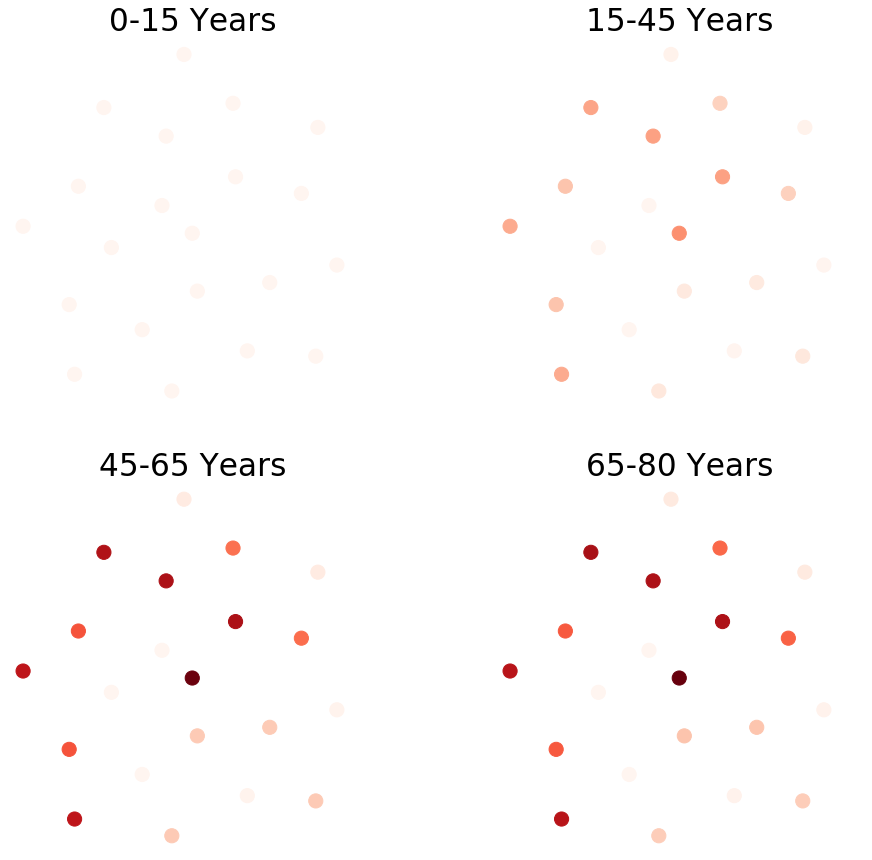

In [8]:
data = model.simulate(S0, E0, Ia0, Is0, Ih0, Ic0, Im0, contactMatrix, Tf, Nt, nodeInteraction='True')

## first M*Nd points are S, then M*Nd points are E, then M*Nd points are Ia,  Is, Ih, Ic, Im, Ni
## thus a total of 8*M*Nd points


radius = np.sqrt(np.arange(Nd)/float(Nd))
golden_angle = np.pi * (3 - np.sqrt(5)); theta = golden_angle * np.arange(Nd)
points = np.zeros((Nd, 2)); points[:,0] = np.cos(theta); points[:,1] = np.sin(theta)
points *= radius.reshape((Nd, 1));  points = points*4*np.sqrt(Nd)




M1=5*M*Nd
f = plt.figure(figsize=(16, 15));   
for ti in range(1):
    ti=Nt-1
    IM1=np.zeros((Nd));  IM2=np.zeros((Nd));  IM3=np.zeros((Nd));  IM4=np.zeros((Nd))
    IS=np.zeros((Nd)); 

    for n in range(Nd):
        for i in range(3):
            IM1[n] += data['X'][ti, M1+n*M+i]
            IS[n] += data['X'][ti, 3*M*Nd+n*M+i]
        for i in range(6):
            IM2[n] += data['X'][ti, M1+n*M+3+i]
        for i in range(4):
            IM3[n] += data['X'][ti, M1+n*M+9+i]
        for i in range(3):
            IM4[n] += data['X'][ti, M1+n*M+12+i]
    
    print(IM4[0:4])
    #print(IS[0:4])
    Imm = (np.max((IM1, IM2, IM3, IM4))) + 0.000001
    IM1 = IM1/Imm
    IM2 = IM2/Imm
    IM3 = IM3/Imm
    IM4 = IM4/Imm


    sz=200
    sp =  f.add_subplot(2,2,1);
    plt.scatter(points[:,0], points[:,1], s=sz*np.ones(Nd), c=IM1, cmap=plt.cm.Reds)
    plt.clim(0, 1);  plt.title('0-15 Years'); plt.axis('square'); plt.axis('off');

    sp =  f.add_subplot(2,2,2);
    plt.scatter(points[:,0], points[:,1], s=sz*np.ones(Nd), c=IM2, cmap=plt.cm.Reds)
    plt.clim(0, 1);   plt.title('15-45 Years'); plt.axis('square'); plt.axis('off');

    sp =  f.add_subplot(2,2,3);
    plt.scatter(points[:,0], points[:,1], s=sz*np.ones(Nd), c=IM3, cmap=plt.cm.Reds)
    plt.clim(0, 1);    plt.title('45-65 Years'); plt.axis('square'); plt.axis('off');

    sp =  f.add_subplot(2,2,4);
    plt.scatter(points[:,0], points[:,1], s=sz*np.ones(Nd), c=IM4, cmap=plt.cm.Reds)
    plt.clim(0, 1); plt.title('65-80 Years'); plt.axis('square'); plt.axis('off'); #plt.colorbar(); 
    
    #plt.savefig('this%05d_.png'%(ti))
    #plt.clf()